In [37]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [38]:
tweets_data_path = './Twitter/Restaurants.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [39]:
print len(tweets_data)

321


In [40]:
tweets = pd.DataFrame()

In [41]:
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
#tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

In [42]:
tweets

,text,lang
0,Phoenix Business: Family behind Tomaso's repla...,en
1,Family behind Tomaso's replaces Scottsdale sea...,en
2,ArizonaNewsnet: Phoenix Business: Family behin...,en
3,ArizonaNewsnet: Phoenix Business: Family behin...,en
4,RT @ArizonaNewsnet: Phoenix Business: Family b...,en
5,Is Pittsburgh The Country's Next Destination F...,en
6,RT @bzygo: Is Pittsburgh The Country's Next De...,en
7,ArizonaNewsnet: Phoenix Business: Family behin...,en
8,Family behind Tomaso’s replaces Scottsdale sea...,en
9,Family behind Tomaso’s replaces Scottsdale sea...,en


In [43]:
tweets_by_lang = tweets['lang'].value_counts()

In [44]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [45]:
tweets['Montreal'] = tweets['text'].apply(lambda tweet: word_in_text('montreal', tweet))
tweets['Las Vegas'] = tweets['text'].apply(lambda tweet: word_in_text('vegas', tweet))
tweets['Pittsburgh'] = tweets['text'].apply(lambda tweet: word_in_text('pittsburgh', tweet))

In [46]:
tweets

,text,lang,Montreal,Las Vegas,Pittsburgh
0,Phoenix Business: Family behind Tomaso's repla...,en,False,False,False
1,Family behind Tomaso's replaces Scottsdale sea...,en,False,False,False
2,ArizonaNewsnet: Phoenix Business: Family behin...,en,False,False,False
3,ArizonaNewsnet: Phoenix Business: Family behin...,en,False,False,False
4,RT @ArizonaNewsnet: Phoenix Business: Family b...,en,False,False,False
5,Is Pittsburgh The Country's Next Destination F...,en,False,False,True
6,RT @bzygo: Is Pittsburgh The Country's Next De...,en,False,False,True
7,ArizonaNewsnet: Phoenix Business: Family behin...,en,False,False,False
8,Family behind Tomaso’s replaces Scottsdale sea...,en,False,False,False
9,Family behind Tomaso’s replaces Scottsdale sea...,en,False,False,False


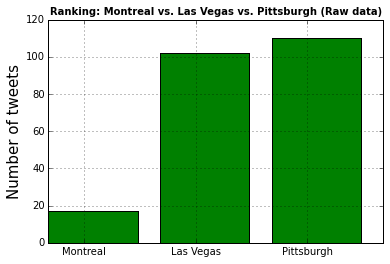

In [52]:
import matplotlib.backends.backend_pdf

cities = ['Montreal', 'Las Vegas', 'Pittsburgh']
tweets_by_city = [tweets['Montreal'].value_counts()[True], tweets['Las Vegas'].value_counts()[True], tweets['Pittsburgh'].value_counts()[True]]

x_pos = list(range(len(cities)))
width = 0.8
fig, ax = plt.subplots()
plt.bar(x_pos, tweets_by_city, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Ranking: Montreal vs. Las Vegas vs. Pittsburgh (Raw data)', fontsize=10, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(cities)
plt.grid()

pp = matplotlib.backends.backend_pdf.PdfPages("TwitterCities.pdf")
pp.savefig()
pp.close()

In [48]:
city_tweets = pd.Series(tweets_by_city)
city_tweets

0     17
1    102
2    110
dtype: int64

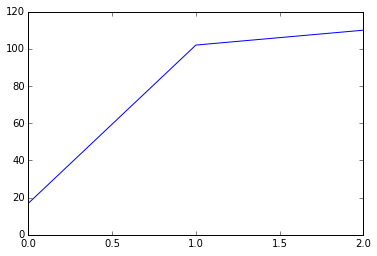

In [49]:
city_tweets.plot()

In [17]:
print tweets['Montreal'].value_counts()[True]

6


In [19]:
print tweets['Las Vegas'].value_counts()[True]

27


In [20]:
print tweets['Pittsburgh'].value_counts()[True]

67
